<h1 style="font-size: 30px; color:darkblue;text-align: center;
           "> PREDICTING RINGS OF ABALONE

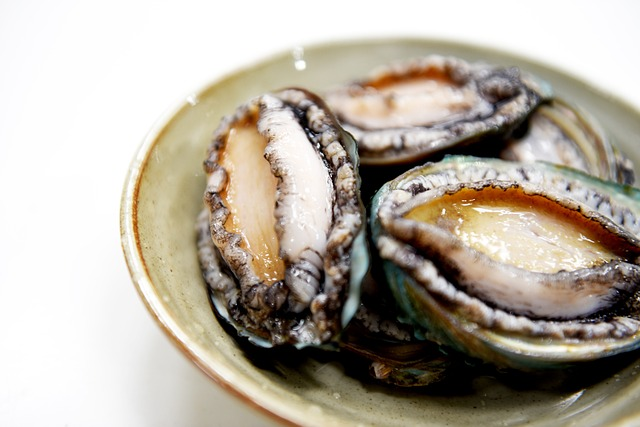

<h1 style="font-size: 17px; color:darkblue;text-align: left;
           "> Dataset Link


https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import klib as k
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
df = pd.read_csv('./abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [4]:
df.shape

(4177, 9)

In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
df.isnull().mean()*100

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64

In [7]:
df.duplicated().sum()

0

<h1 style="font-size: 20px; color:red;text-align: left;
           "> Univariate Analysis

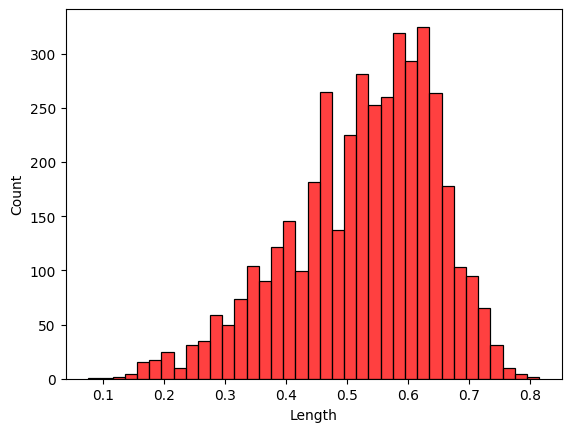

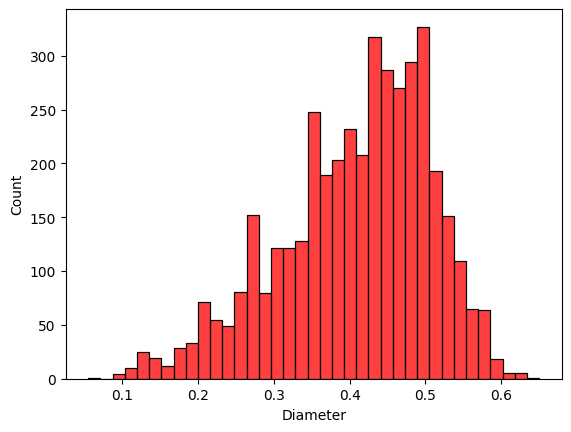

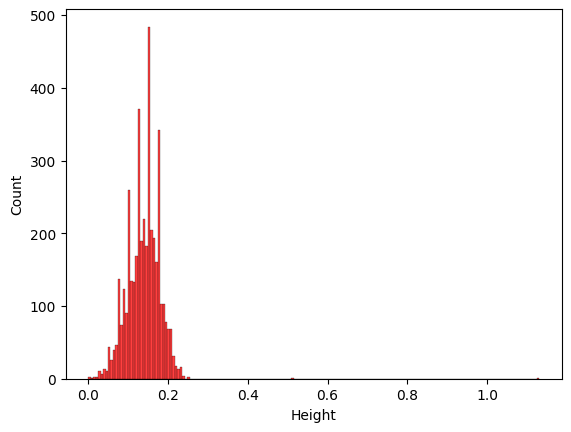

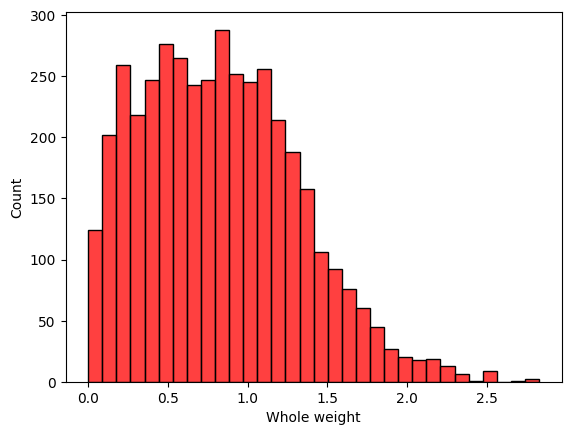

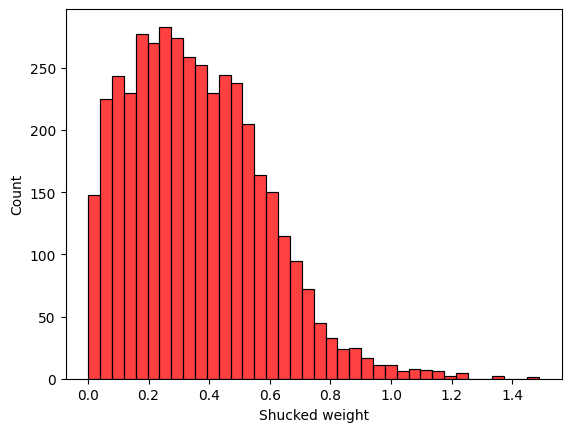

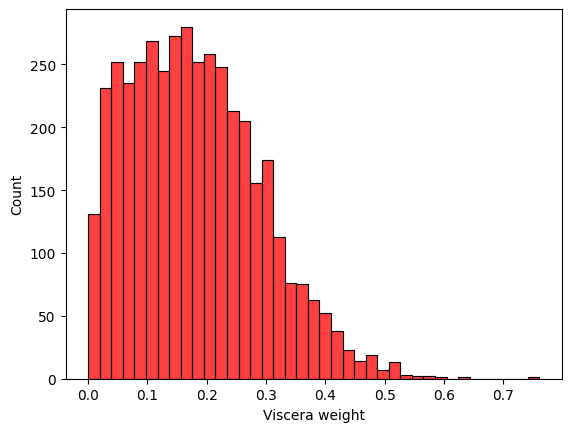

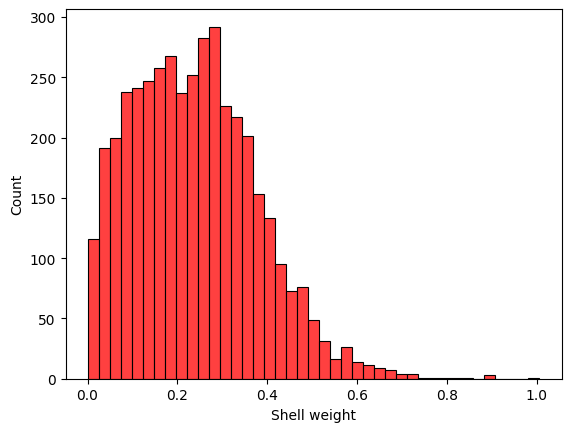

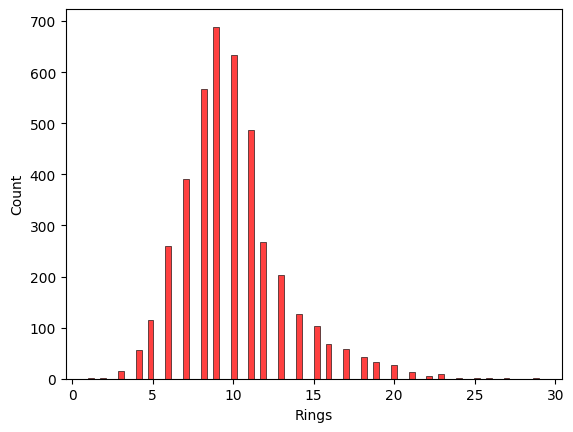

In [8]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.histplot(x=df[i],color='red')
        plt.show()

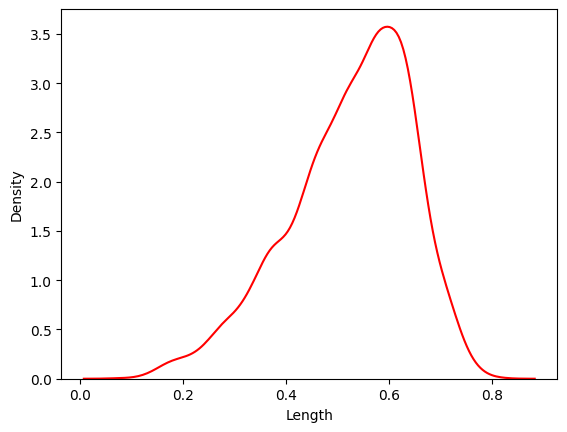

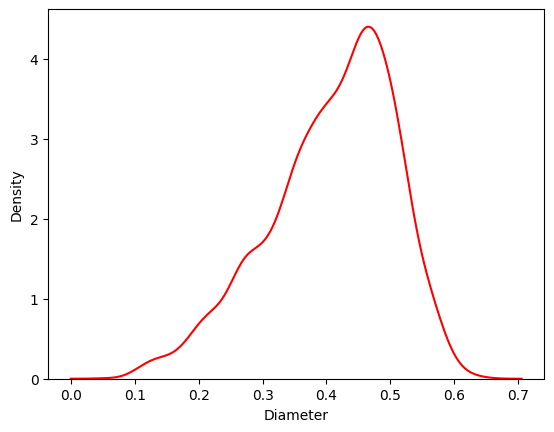

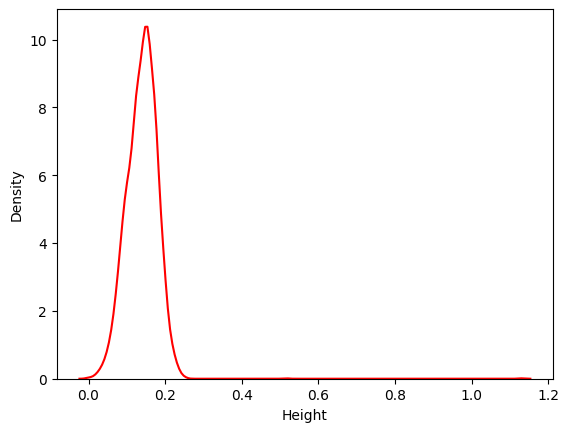

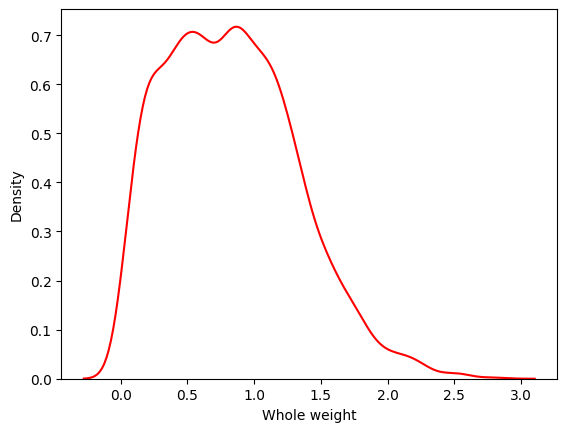

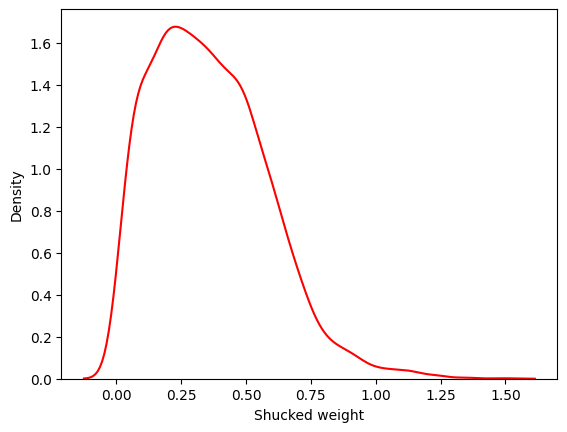

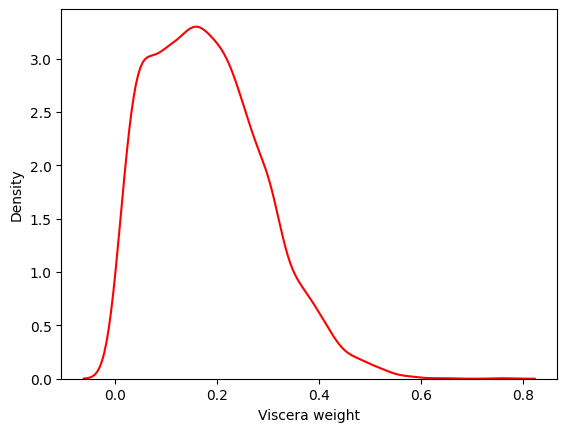

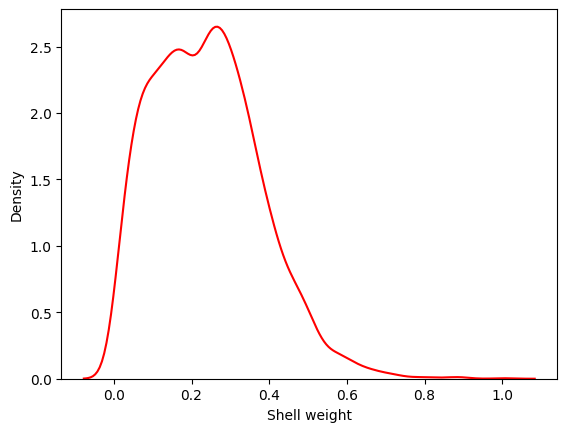

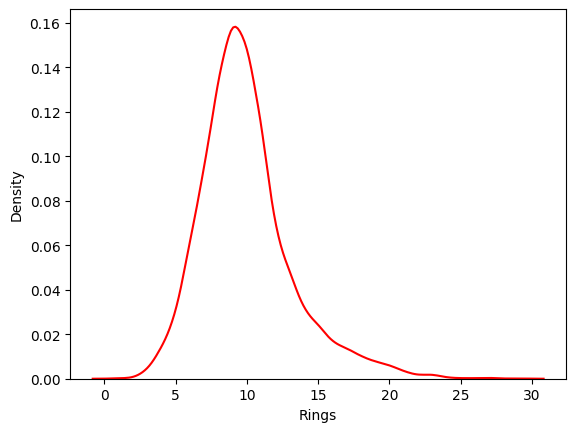

In [9]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.kdeplot(x=df[i],color='red')
        plt.show()

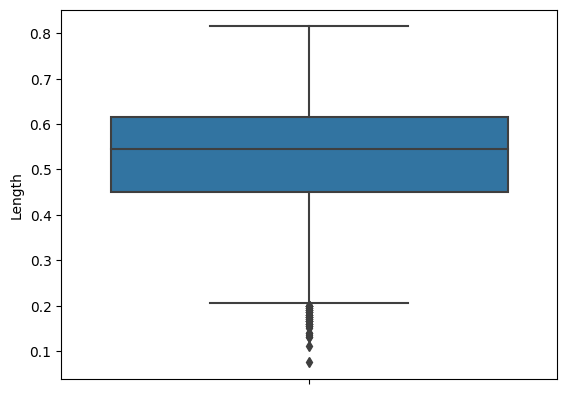

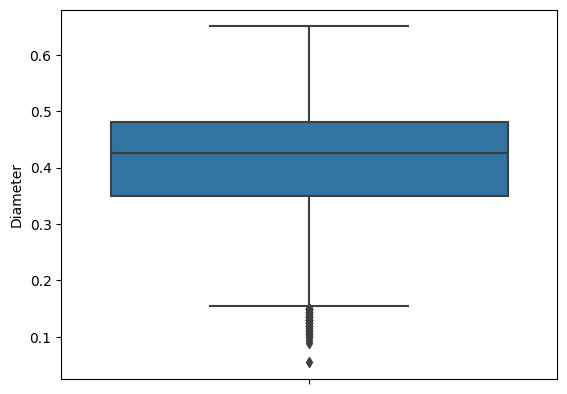

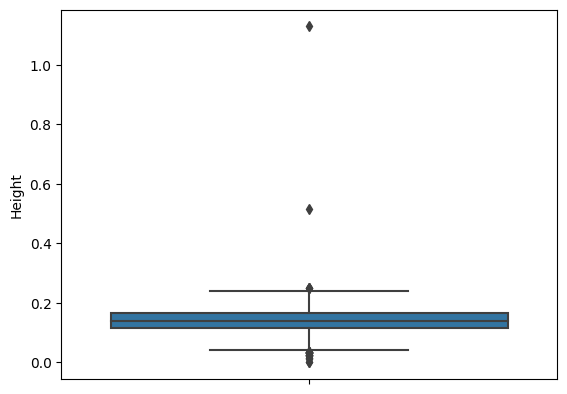

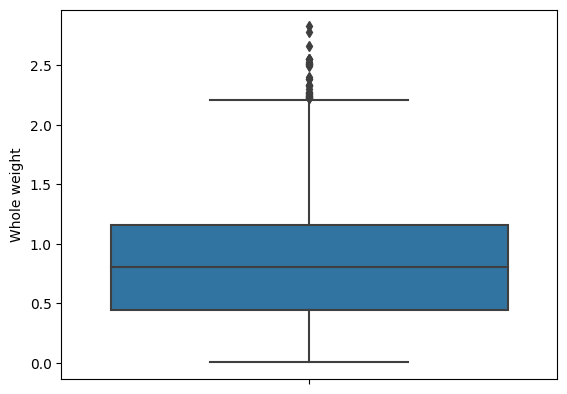

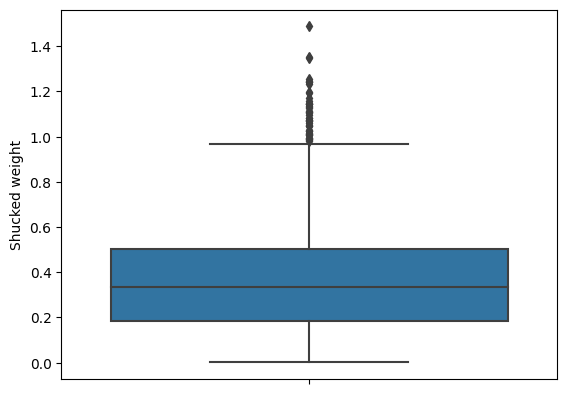

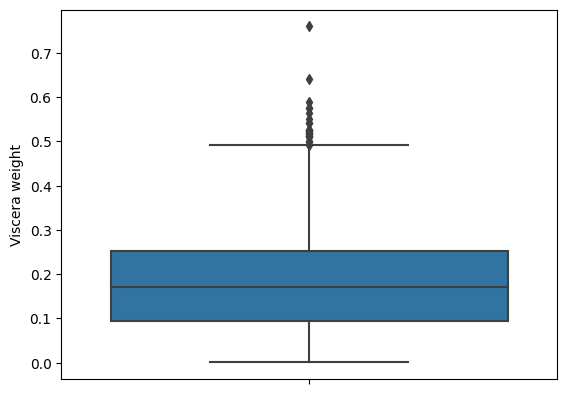

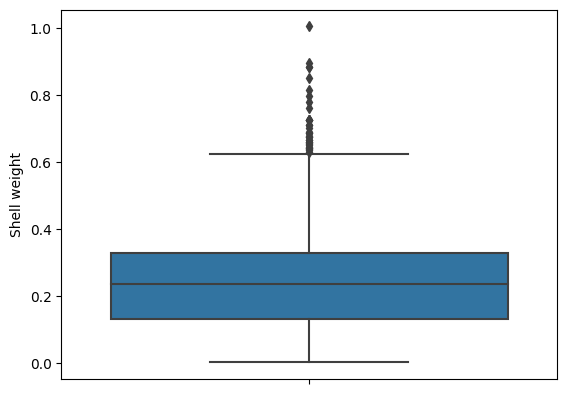

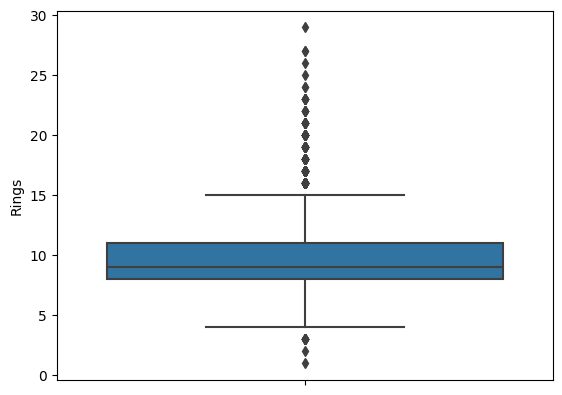

In [10]:
for i in df.columns:
    if df[i].dtypes != "object":
        sns.boxplot(y= df[i])
        plt.show()

<h1 style="font-size: 20px; color:red;text-align: left;
           "> Multivariate Analysis

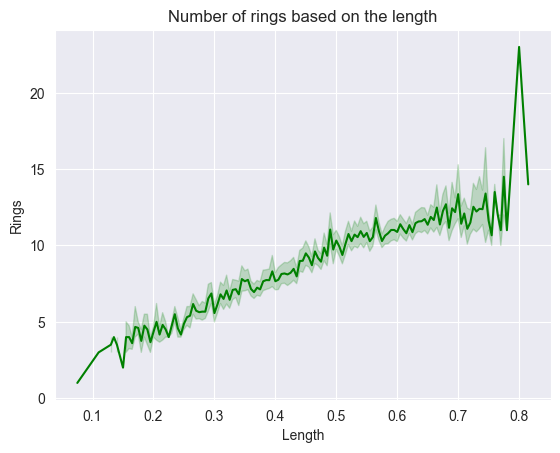

In [11]:
sns.set_style('darkgrid')
plt.title('Number of rings based on the length')
sns.lineplot(x='Length', y='Rings', data=df.sort_values(by='Length'),color='green');

In [12]:
df.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

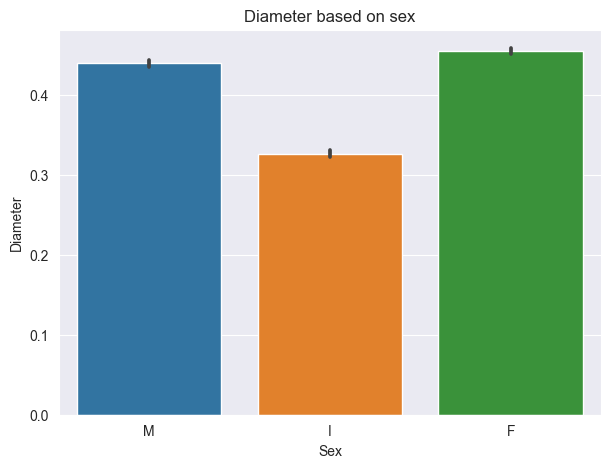

In [13]:
plt.figure(figsize=(7,5))
plt.title('Diameter based on sex')
sns.barplot(x='Sex', y='Diameter', data=df.sort_values(by='Sex', ascending=False));

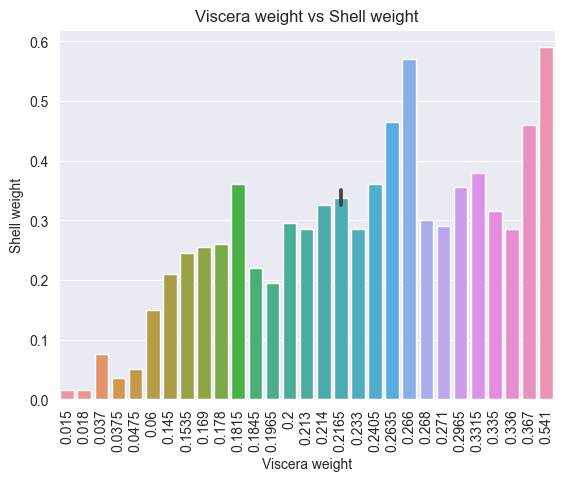

In [14]:
sns.barplot(x="Viscera weight", y="Shell weight", data=df[170:200])
plt.title("Viscera weight vs Shell weight")
plt.xticks(rotation=90)
plt.show()
plt.style.use("ggplot")

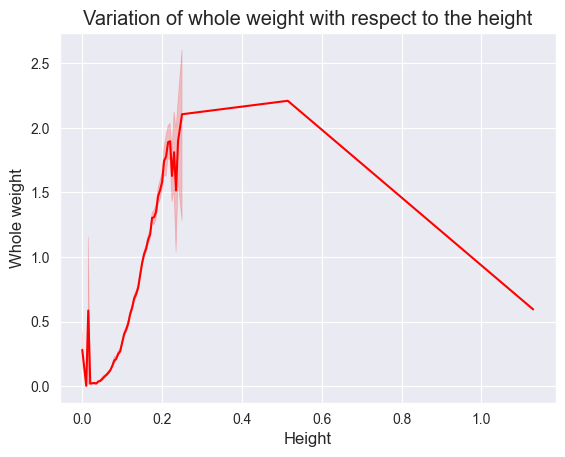

In [15]:
sns.set_style('darkgrid')
plt.title('Variation of whole weight with respect to the height')
sns.lineplot(x='Height', y='Whole weight', data=df.sort_values(by='Height'),color='red');

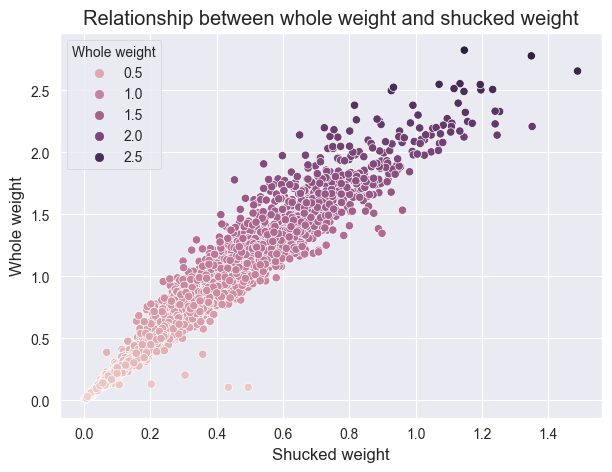

In [16]:
plt.figure(figsize=(7,5))
figure = sns.scatterplot(data=df, x='Shucked weight', y='Whole weight', hue='Whole weight')
plt.title('Relationship between whole weight and shucked weight')
plt.show()

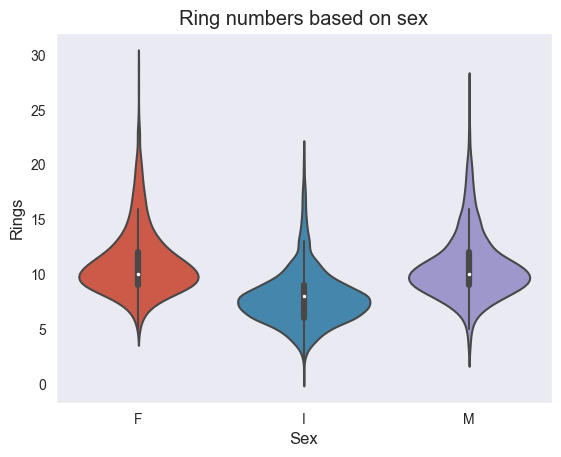

In [17]:
sns.set_style('dark')
sns.violinplot(x="Sex",y="Rings",data=df.sort_values(by="Sex",ascending=True))
plt.title('Ring numbers based on sex')
plt.show()

<h1 style="font-size: 20px; color:red;text-align: left;
           "> Outlier Treatment

In [18]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [19]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

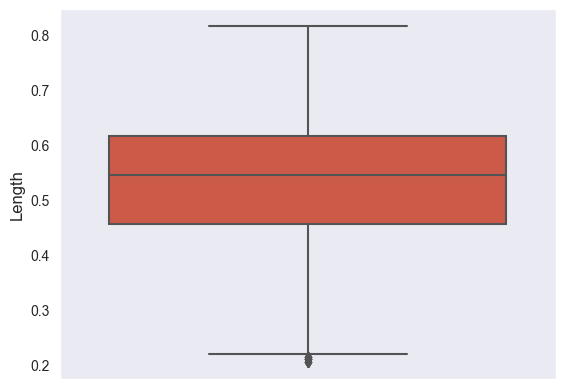

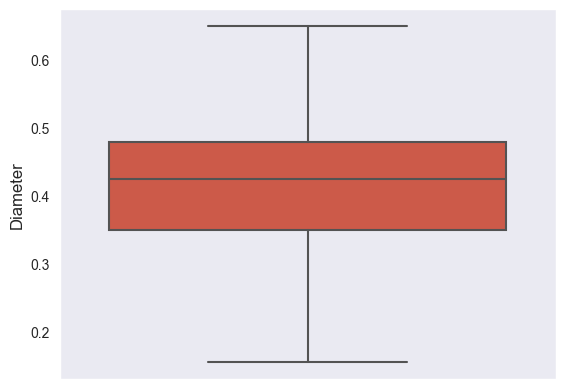

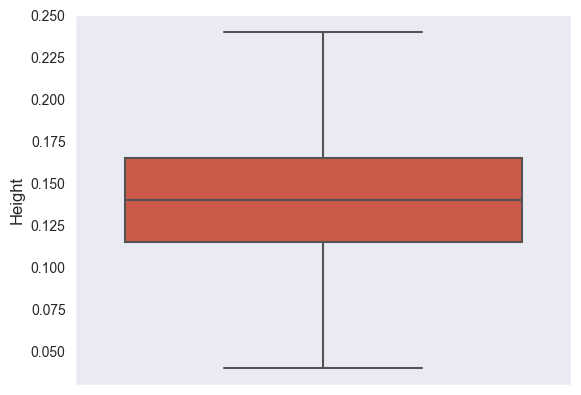

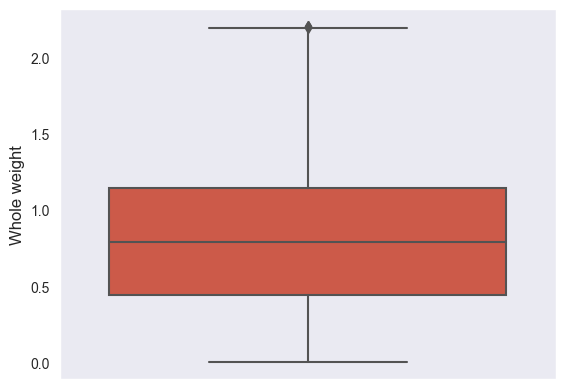

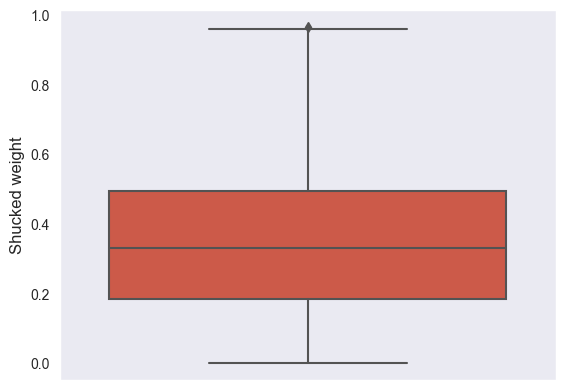

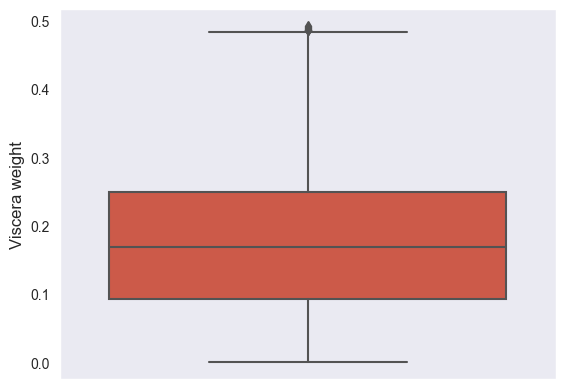

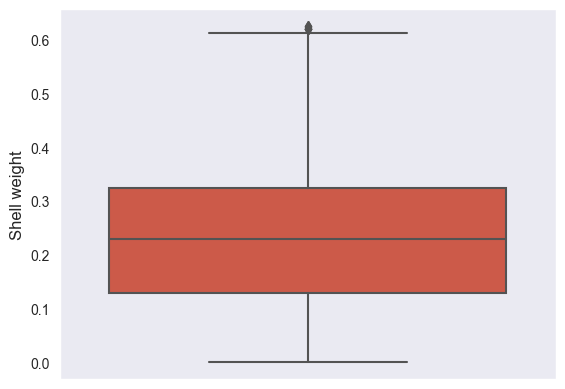

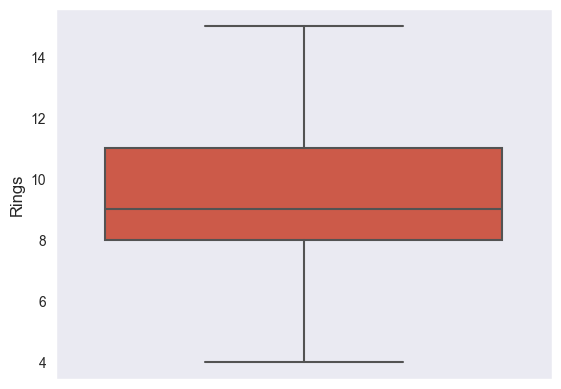

In [20]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.figure
        plt.show()

In [21]:
df.dropna(inplace=True)

<h1 style="font-size: 20px; color:red;text-align: left;
           "> Label encoding the categorical columns

In [22]:
le = LabelEncoder()

In [23]:
df['Sex'] = le.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3781 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3781 non-null   int32  
 1   Length          3781 non-null   float64
 2   Diameter        3781 non-null   float64
 3   Height          3781 non-null   float64
 4   Whole weight    3781 non-null   float64
 5   Shucked weight  3781 non-null   float64
 6   Viscera weight  3781 non-null   float64
 7   Shell weight    3781 non-null   float64
 8   Rings           3781 non-null   float64
dtypes: float64(8), int32(1)
memory usage: 280.6 KB


<h1 style="font-size: 20px; color:red;text-align: left;
           "> Checking the correlation with the target 'Rings'


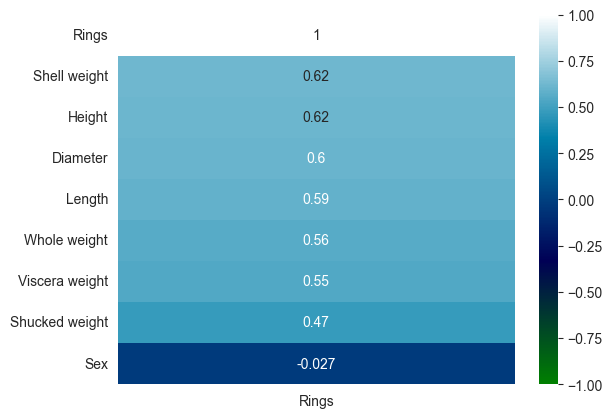

In [25]:
sns.heatmap(df.corr()[["Rings"]].sort_values(by="Rings", ascending=False), vmin=-1, vmax=1, annot=True,cmap="ocean");

<h1 style="font-size: 20px; color:red;text-align: left;
           "> Let's take only the columns with good correlation with the target

In [26]:
x = df[[ 'Shell weight','Height','Diameter','Length','Whole weight','Viscera weight']].values
y = df[['Rings']].values

<h1 style="font-size: 20px; color:red;text-align: left;
           "> Feature Scaling

In [27]:
sc = StandardScaler()

In [28]:
x = sc.fit_transform(x)

<h1 style="font-size: 20px; color:red;text-align: left;
           "> Cross Validation And Model Building

In [29]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [30]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.7449241829181101
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1.7448103141566456
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  1.7409414637130929
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  2.365323796781586
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  1.6844175173959404
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.852804660947084
********************************************

<h1 style="font-size: 16px; color:red;text-align: left;
           "> We can see that "GradientBoostingRegressor" is having the best overall perfomance so far. We may proceed with it.

In [31]:
model = GradientBoostingRegressor()

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [34]:
y_pred = model.predict(x)

In [35]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [36]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,15.0,8.826740
1,7.0,7.442163
2,9.0,9.459005
3,10.0,9.509612
4,7.0,6.999517


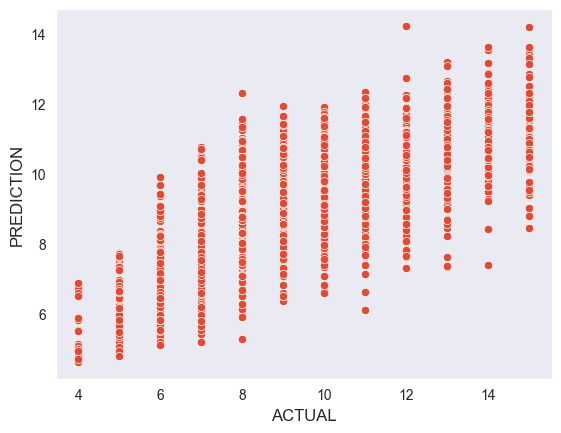

In [37]:
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");